In [5]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import torch

from transformers import Blip2Processor, Blip2ForConditionalGeneration, pipeline

In [4]:
caption_preprocessor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
caption_generator = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", load_in_4bit = True, device_map = "cuda")
translator = pipeline('translation', model = 'Mitsua/elan-mt-bt-en-ja', device = "cuda")

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/121M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/304 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/793k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

/home/user/Colab_20250113/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


  0%|          | 0/1 [00:00<?, ?it/s]/home/user/Colab_20250113/lib/python3.11/site-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


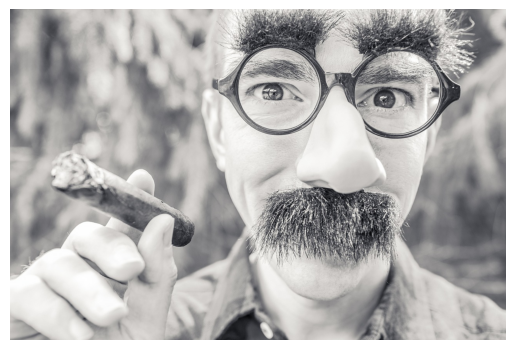

口髭と眼鏡をかけた男性。


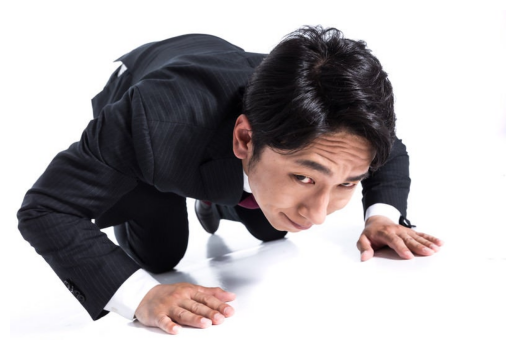

スーツを着たアジア人男性が床をう様子


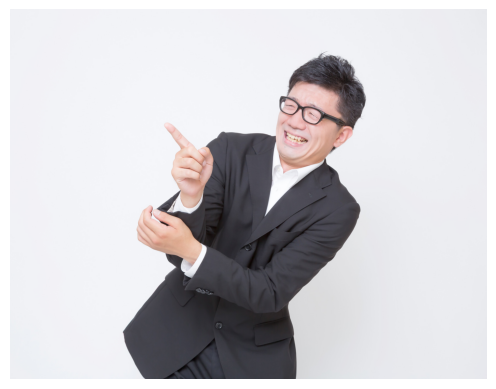

カメラを向けるスーツ姿の青年。


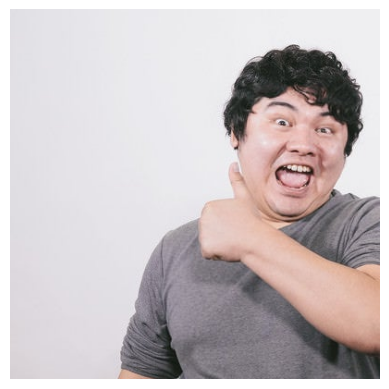

親指を立てた男


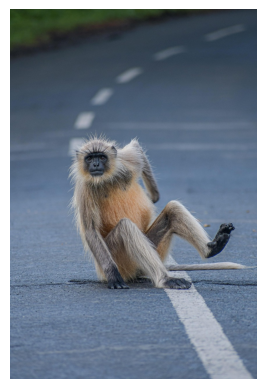

道に座る猿


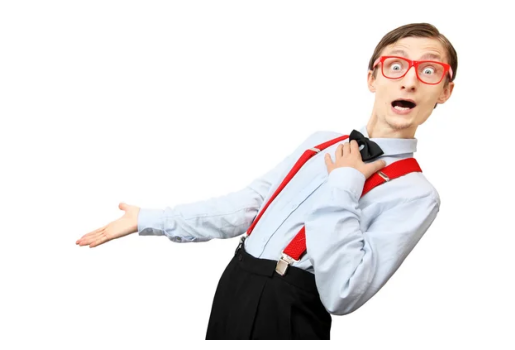

蝶結びの男性とサスペンダー


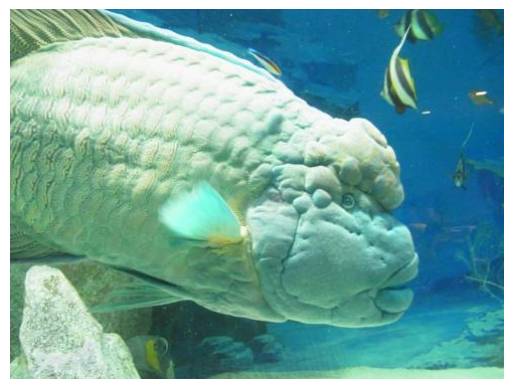

水族館の大型魚


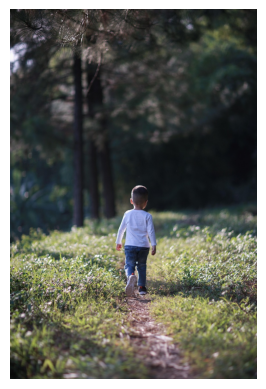

森の中を歩いている子供


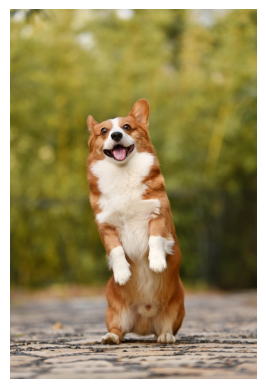

後ろ足に犬が立っている姿。


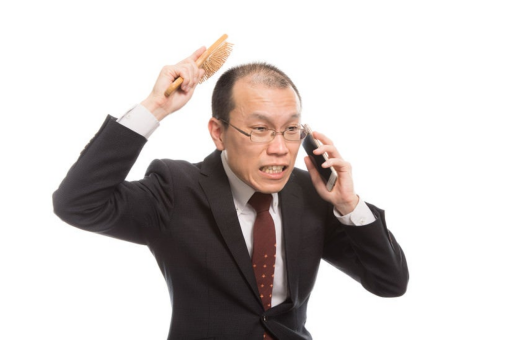

櫛を手にしたスーツ姿のアジア人男性


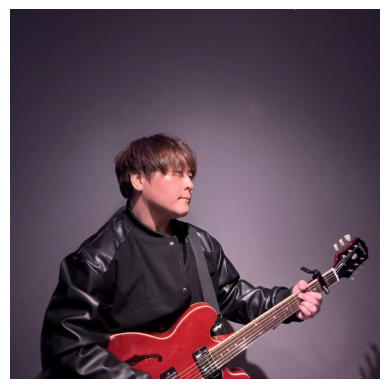

エレキギターを弾く黒い革のジャケットを着た男性


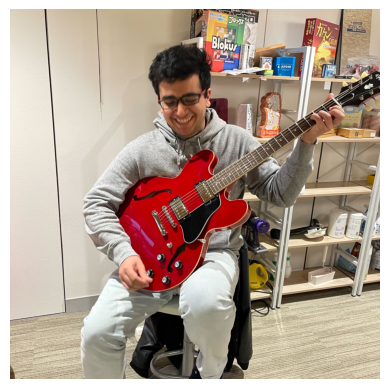

赤いギターを持った椅子に座っている青年。


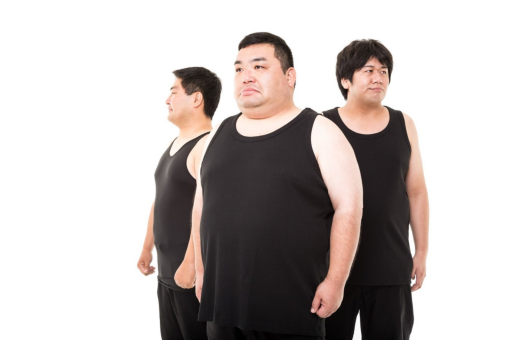

黒タンクトップの男性3人


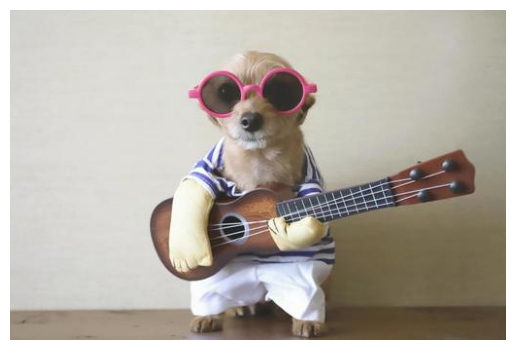

サングラスをかけウクレレを抱いている犬。


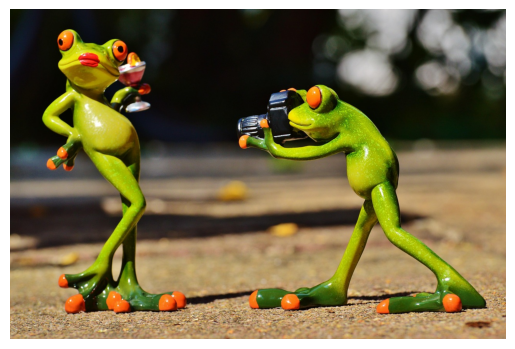

カメラを持っている緑色のカエル


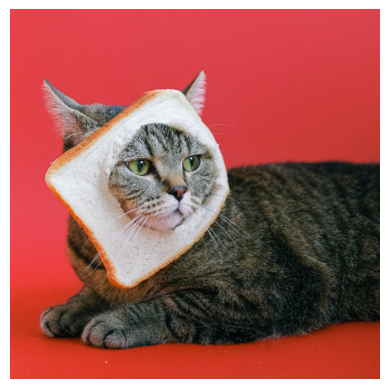

ブレッド・ハットをかぶった猫


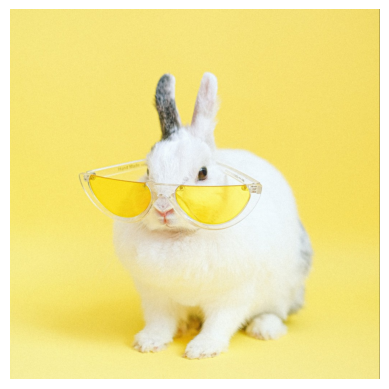

黄色のサングラスを身に着けた白いウサギ


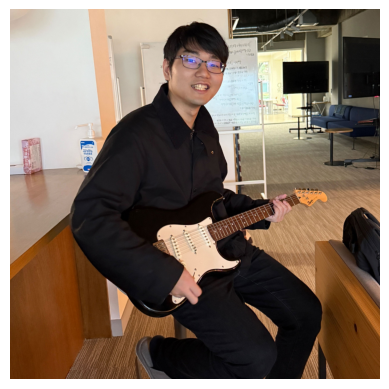

メガネをかけたエレキギターを弾く青年。


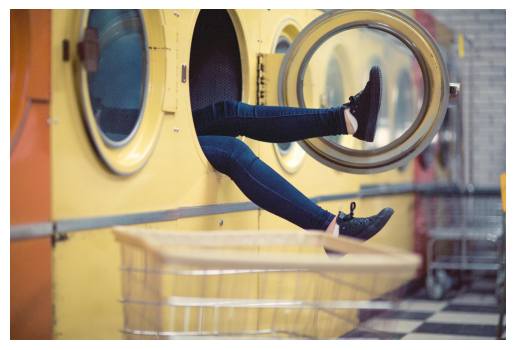

洗濯機に座っている人。


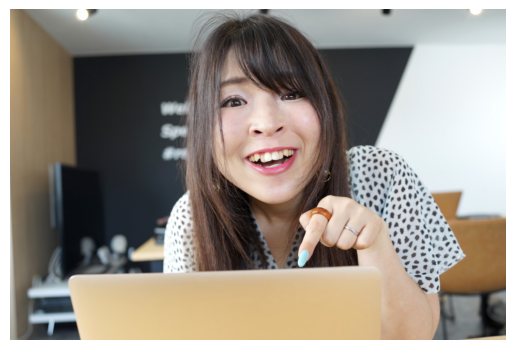

ノートパソコンで微笑む女性


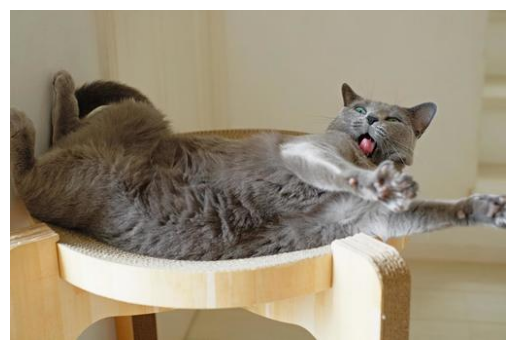

木製の椅子に乗った猫


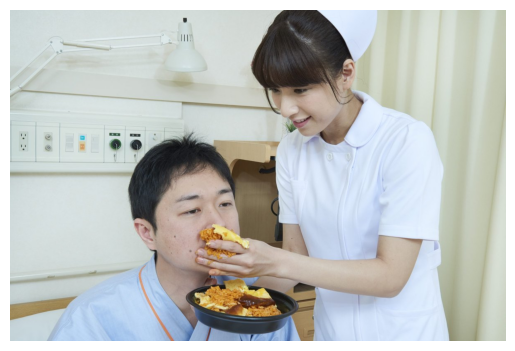

患者に食事を与える看護師


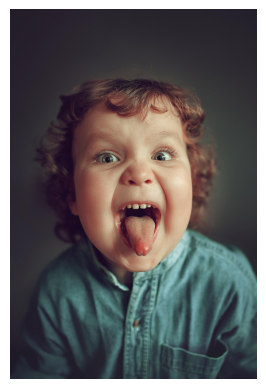

100%|██████████| 1/1 [00:06<00:00,  6.03s/it]

舌を抜いた少年。


In [7]:
BS = 128
IMAGE_DIR = "test_images"
image_paths = [f"{IMAGE_DIR}/{IP}" for IP in os.listdir(IMAGE_DIR)]

for idx in tqdm(range(0, len(image_paths), BS)):

    batch_IP = [f"{I}" for I in image_paths[idx:idx+BS]]
    images = [Image.open(IP).convert("RGB") for IP in batch_IP]
    inputs = caption_preprocessor(images, return_tensors = "pt").to("cuda")
    out = caption_generator.generate(**inputs)
    eng_captions = [caption_preprocessor.decode(O, skip_special_tokens=True) for O in out]
    ja_captions = [T["translation_text"] for T in translator(eng_captions)]

    for I, C in zip(images, ja_captions):
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.imshow(I)
        ax.axis("off")
        plt.show()

        print(C)
        print("=" * 10)